In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import (print_function, unicode_literals, division)

In [3]:
try:
    from urllib.parse import urlparse
except ImportError:
    from urlparse import urlparse

In [4]:
from itertools import islice

# package up logic in a package
from hypothesisapi import API

# include your hypothes.is USERNAME, PASSWORD as parameters in a hypothesis_settings.py file in your sys.path
from hypothesis_settings import USERNAME, PASSWORD

h_api = API(USERNAME,PASSWORD)
h_api.login()

In [5]:
import numpy as np
import pandas as pd
from pandas import (DataFrame, Series)
import matplotlib.pyplot as plt

In [6]:
# reading in all the annotations
annotations = list(h_api.search(user='rdhyee', offset=0))

In [7]:
len(annotations)

227

In [8]:
h_api.create_annotation_w_text("hello hypothes.is")

In [10]:
# collect all the stats

from itertools import islice

annotations = []

for (i, annot) in enumerate(islice(h_api.search(), None)):
    print("\r%d" % i , end="")
    annotations.append(annot)

17298

In [14]:
# write annotations out
import json
with open("annotations.json", "wb") as f:
    f.write(json.dumps(annotations))

In [ ]:
# read in annotations
import json
#annotations = json.loads(open("annotations.json").read())

In [15]:
df = DataFrame(annotations)
df.head()

,consumer,created,deleted,document,favicon_link,highlightText,id,permissions,ranges,references,source,source_stripped,tags,target,text,title,updated,uri,user
0,00000000-0000-0000-0000-000000000000,2013-07-09T10:39:09.321162+00:00,NaN,"{u'scholar': {}, u'title': u'Imagine | Hypothe...",NaN,NaN,0kgdoTzYQuq0OzRTx6AFAw,"{u'admin': [u'acct:tilgovi@hypothes.is'], u're...",NaN,[-z893IEuS5uvt2pvjV6n6Q],NaN,NaN,NaN,[],Okay!,NaN,2013-07-09T10:39:09.321181+00:00,http://hypothes.is/,acct:tilgovi@hypothes.is
1,00000000-0000-0000-0000-000000000000,2013-08-06T16:12:20.854906+00:00,NaN,"{u'scholar': {}, u'title': u'Martial McLuhan I...",NaN,NaN,v3eUHkqzTQ-iwvEIB3EmPw,"{u'admin': [u'acct:JakeHartnell@hypothes.is'],...","[{u'endOffset': 500, u'endContainer': u'/div[1...",NaN,NaN,NaN,[question],[{u'source': u'http://www.enculturation.net/ma...,I missed the last couple of classes! What is i...,NaN,2013-08-06T16:12:20.854921+00:00,http://www.enculturation.net/martial-mcluhan-2,acct:JakeHartnell@hypothes.is
2,00000000-0000-0000-0000-000000000000,2013-08-06T16:13:01.460414+00:00,NaN,"{u'scholar': {}, u'title': u'Martial McLuhan I...",NaN,NaN,lpzXzp9lSjeVJq1UCXny_Q,"{u'admin': [u'acct:caseyboyle@hypothes.is'], u...","[{u'endOffset': 425, u'endContainer': u'/div[1...",NaN,NaN,NaN,"[on war, battle]",[{u'source': u'http://www.enculturation.net/ma...,Test text.,NaN,2013-08-06T16:13:01.460439+00:00,http://www.enculturation.net/martial-mcluhan-2,acct:caseyboyle@hypothes.is
3,00000000-0000-0000-0000-000000000000,2013-08-06T16:13:07.755733+00:00,NaN,"{u'scholar': {}, u'title': u'Martial McLuhan I...",NaN,NaN,48uHoGGOQCOc3esz5N6a-A,"{u'admin': [u'acct:dwhly@hypothes.is'], u'read...","[{u'endOffset': 31, u'endContainer': u'/div[1]...",NaN,NaN,NaN,[whozzat],[{u'source': u'http://www.enculturation.net/ma...,Never heard of him,NaN,2013-08-06T16:13:07.755746+00:00,http://www.enculturation.net/martial-mcluhan-2,acct:dwhly@hypothes.is
4,00000000-0000-0000-0000-000000000000,2013-08-06T16:13:55.544440+00:00,NaN,"{u'scholar': {}, u'title': u'Martial McLuhan I...",NaN,NaN,P3D9bpyhQKK5nOz8hWJe8w,"{u'admin': [u'acct:dwhly@hypothes.is'], u'read...",NaN,[lpzXzp9lSjeVJq1UCXny_Q],NaN,NaN,NaN,[],"casey, can you explain",NaN,2013-08-06T16:13:55.544461+00:00,http://www.enculturation.net/martial-mcluhan-2,acct:dwhly@hypothes.is


In [16]:
# date distribution
import dateutil.parser
s = df.created.apply(dateutil.parser.parse).apply(lambda d: (d.year, d.month)).value_counts()
s

(2015, 5)     3439
(2015, 2)     1942
(2015, 4)     1920
(2013, 9)     1765
(2015, 3)     1537
(2013, 10)    1206
(2013, 11)     957
(2015, 1)      868
(2014, 2)      505
(2014, 1)      360
(2014, 12)     351
(2014, 10)     328
(2014, 5)      320
(2014, 11)     305
(2014, 4)      305
(2014, 3)      280
(2013, 12)     252
(2013, 8)      251
(2014, 9)      170
(2014, 8)       91
(2014, 6)       87
(2014, 7)       59
(2013, 7)        1
dtype: int64

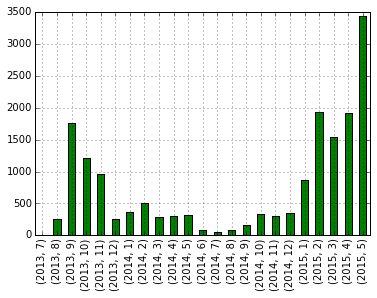

In [17]:
(s.sort_index(ascending=True).plot(kind='bar', color='green', # x='year/month', y='# of annotations'
                                  ))

In [18]:
df.user.value_counts()

acct:judell@hypothes.is             751
acct:juan@hypothes.is               738
acct:dwhly@hypothes.is              551
acct:tilgovi@hypothes.is            426
acct:aculich@hypothes.is            415
acct:dbeckstrom@hypothes.is         398
acct:tsjordan@hypothes.is           285
acct:jgmac1106@hypothes.is          284
acct:Jmcclurken@hypothes.is         263
acct:jeremydean@hypothes.is         259
acct:bluebird_chaser@hypothes.is    251
acct:rdhyee@hypothes.is             228
acct:emahoney@hypothes.is           214
acct:yukamuratani@hypothes.is       203
acct:EP7@hypothes.is                187
acct:mmebrady@hypothes.is           173
acct:domgaiatheoroi@hypothes.is     171
acct:memartone@hypothes.is          154
acct:mitchellreber@hypothes.is      153
acct:jillydreadful@hypothes.is      140
acct:abumajid2013@hypothes.is       136
acct:JackDougherty@hypothes.is      121
acct:jhlenzi@hypothes.is            120
acct:alex_hinerman@hypothes.is      116
acct:ilam9@hypothes.is              109


In [19]:
df.uri.apply(lambda url: urlparse(url)[1]).value_counts()

                                      1708
caseyboyle.net                        1224
via.hypothes.is                       1110
rhetoric.eserver.org                   952
www.perseus.tufts.edu                  941
tkbr.ccsp.sfu.ca                       753
sosol.perseids.org                     609
hypothes.is                            528
shakespeare.mit.edu                    517
umwblogs.org                           251
www.nytimes.com                        226
scalar.usc.edu                         210
gap2.alexandriaarchive.org             161
www.transmography.net                  150
github.com                             143
courses.candelalearning.com            123
www.shuttleworthfoundation.org         118
dohistory.org                          114
www9.georgetown.edu                    112
en.wikipedia.org                       108
archive.stsci.edu                       85
cs231n.github.io                        85
jonudell.net                            77
wiki.shuttl

In [20]:
# most annotated web pages
df.uri.value_counts()

http://shakespeare.mit.edu/macbeth/full.html                                                                                                     516
http://caseyboyle.net/3860/readings/gorgias.html                                                                                                 267
http://caseyboyle.net/3860/readings/antidosis.html                                                                                               227
http://caseyboyle.net/3860/readings/nietzsche.html                                                                                               204
http://sosol.perseids.org/sosol/publications/12078/epi_cts_identifiers/15840/preview                                                             171
http://sosol.perseids.org/sosol/publications/12054/epi_cts_identifiers/15800/preview                                                             168
http://caseyboyle.net/3860/readings/dissoi.html                                                           

In [21]:
# look for pages annotated as part of climatefeedback.org
# http://climatefeedback.org/members/early-participants.html

climatefeedback_members = ['karmour', 'Alexis_b', 'drchavas', 'jgdwyer', 'emanuel', 'ed_hawkins', 'Dkambo',
                            'aklocker', 'james_kossin', 'jmlauderdale', 'mashayek', 's_perkins',
                            'andypitman', 'hramsay','kevenroy', 'martysingh','alexis.tantet',
                            'emvincent','bmv','DonWuebbles','aalpert']
clf_accts = ["acct:{user}@hypothes.is".format(user=user) for user in climatefeedback_members] 

In [23]:
clf_annots = df[df.user.isin(clf_accts)]
clf_annots.uri.value_counts()

http://online.wsj.com/articles/climate-science-is-not-settled-1411143565                                                                                                                                       42
http://www.wsj.com/articles/bjorn-lomborg-the-alarming-thing-about-climate-alarmism-1422832462                                                                                                                 21
http://www.nytimes.com/2015/01/17/science/earth/2014-was-hottest-year-on-record-surpassing-2010.html                                                                                                           13
https://via.hypothes.is/h/http://mashable.com/2015/03/16/vanuatu-cyclone-pam-global-warming/                                                                                                                    8
http://www.forbes.com/sites/robertbradley/2014/12/01/doubling-down-on-climate-alarmism/                                                                         